In [13]:
from stepmix.stepmix import StepMix
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV, ParameterGrid

import matplotlib.pyplot as plt
import seaborn as sns

import pickle as pkl

In [14]:
df = pd.read_csv("../data/cleaned_data_SYMPTOMS_9_13_23.csv", index_col=0)
sympdf = df.loc[:, df.columns.str.startswith('Symptom_')]
sympdf.shape
# filter to match
sympdf = sympdf.loc[:, (sympdf.sum() / sympdf.shape[0] > 0.05) & (sympdf.sum()  / sympdf.shape[0]< 0.95)]


array([[<Axes: title={'center': 'Physical_PEM_Severity'}>]], dtype=object)

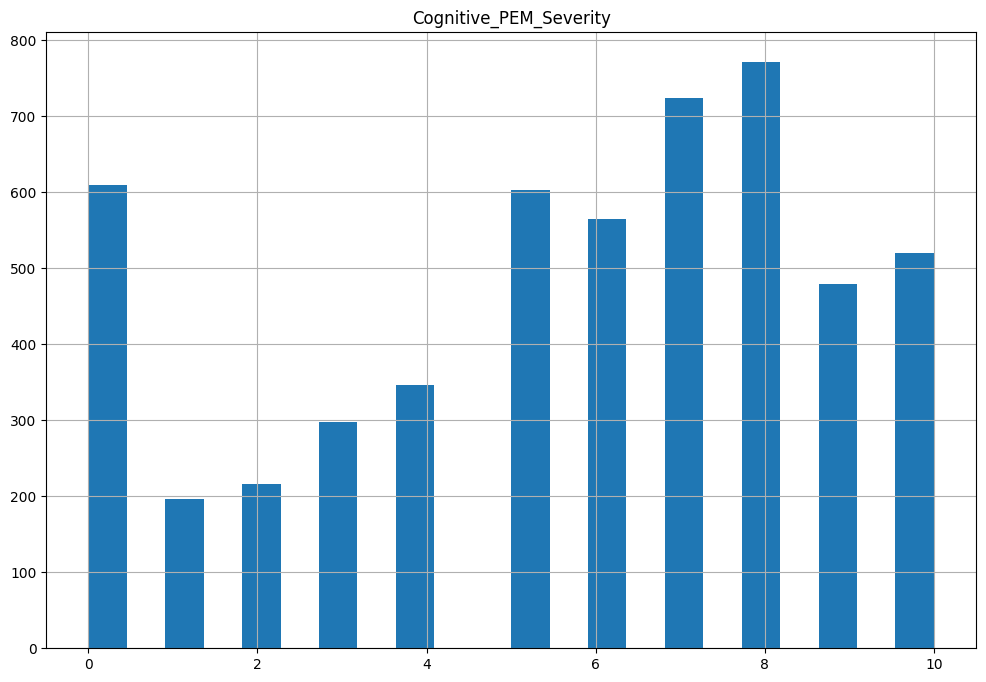

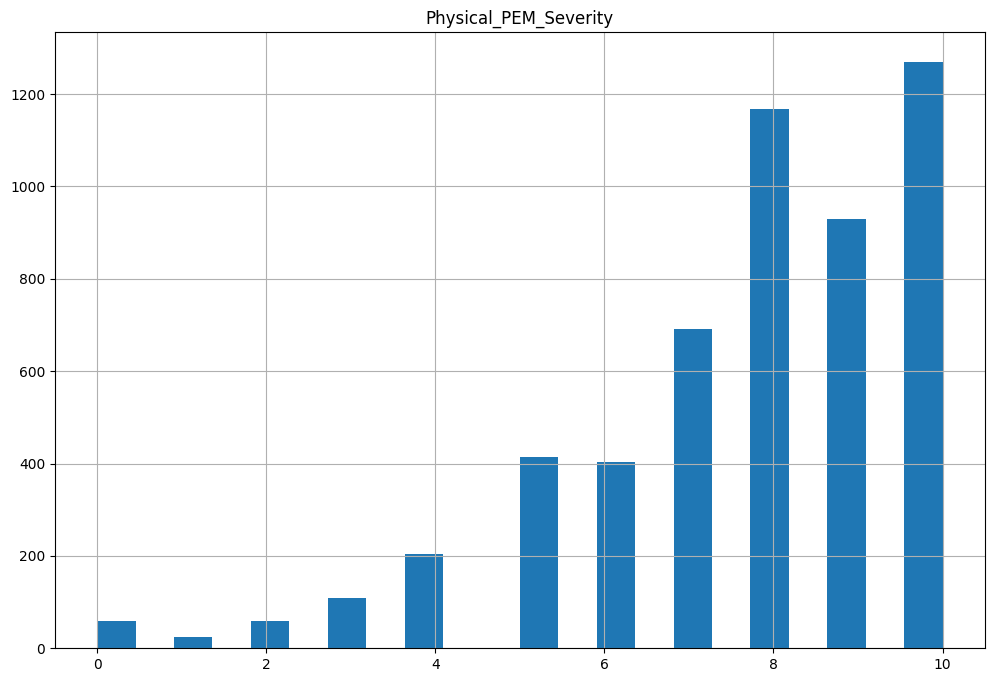

In [15]:
df.hist("Cognitive_PEM_Severity", bins=22, figsize=(12, 8))
df.hist("Physical_PEM_Severity", bins=22, figsize=(12, 8))

In [16]:
df['Cognitive_PEM_Severity'].isna()

3        False
5        False
6        False
8        False
9        False
         ...  
14158    False
14161    False
14163    False
14166     True
14168    False
Name: Cognitive_PEM_Severity, Length: 6031, dtype: bool

In [17]:
# convert entries in df['Cognitive_PEM_Severity] with value 0.0 to np.nan

# after further discussion with team, removing this step 
#df.loc[df['Cognitive_PEM_Severity'] == 0.0, 'Cognitive_PEM_Severity'] = np.nan
#df.loc[df['Physical_PEM_Severity'] == 0.0, 'Physical_PEM_Severity'] = np.nan

In [18]:
def load_run(n_components, date):
    clusters = pd.read_csv("output/cluster_"+str(n_components)+"_"+date+".csv", index_col=0)
    clusters_ambig =  pd.read_csv("output/cluster_"+str(n_components)+"_ambiguousNaN_"+date+".csv", index_col=0)
    mm = pd.read_csv("output/stepmix_"+str(n_components)+"_"+date+"_mmdf.csv", index_col=0)
    symp_unusual = pd.read_csv("output/stepmix_"+str(n_components)+"_"+date+"_symp_unusual.csv", index_col=0)
    preddf = pd.read_csv("output/stepmix_"+str(n_components)+"_"+date+"_preddf.csv", index_col=0)
    file_path = "output/stepmix_"+str(n_components)+"_"+date+".pkl"

    with open(file_path, 'rb') as file:
        model = pkl.load(file)
    return({"clusters": clusters, "mm": mm, "symp_unusual": symp_unusual, "model": model, 'clusters_ambig': clusters_ambig, 'preddf':preddf})

In [19]:
n_components = 13
date = "111023"

res = load_run(n_components, date)

In [20]:
df['cluster'] = res['clusters']['cluster']

In [21]:
df['cluster_ambig'] = res['clusters_ambig']['cluster']

In [22]:
# for each cluster plot the fraction of each value of Flag_MECFS
df['Flag_MECFS'] = df['Flag_MECFS'].astype('category')
df['cluster'] = df['cluster'].astype('category')




In [23]:
def plot_flag(compare_var, df, cluscol='cluster', equal_heights=False):
    # Assuming df is your DataFrame
    df[compare_var] = df[compare_var].astype('category')
    df[cluscol] = df[cluscol].astype('category')

    # Create a DataFrame to store the counts
    cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)

    # Normalize counts within each cluster if equal_heights is True
    if equal_heights:
        cluster_counts = cluster_counts.div(cluster_counts.sum(axis=1), axis=0)

    # Plot the stacked bar chart
    sns.set(style="darkgrid")
    plt.figure(figsize=(12, 8))

    # Define the colors for each 'Flag_MECFS' value
    colors = sns.color_palette('husl', n_colors=len(df[compare_var].unique()))

    # Plot the stacked bars
    cluster_counts.plot(kind='bar', stacked=True, color=colors, edgecolor='black')

    # Set plot labels and title
    plt.xlabel('Cluster')
    plt.ylabel('Count' if not equal_heights else 'Fraction')
    plt.title('Stacked Bar Chart of ' + compare_var + ' for each Cluster')

    # Display the legend
    plt.legend(title=compare_var, bbox_to_anchor=(1.05, 1), loc='upper left')

    # Show the plot
    plt.show()




/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

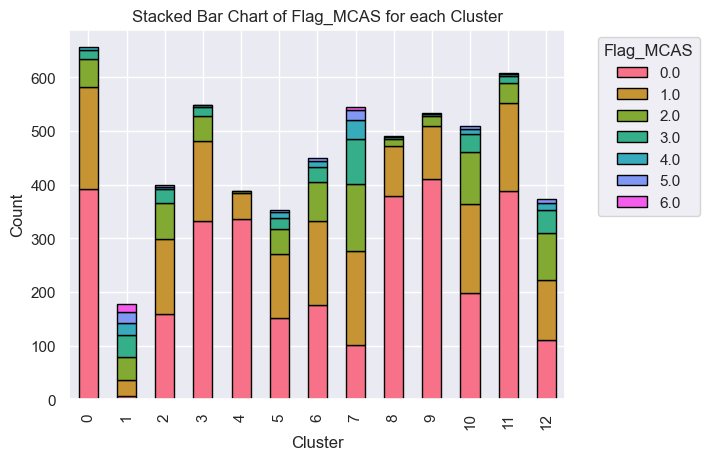

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

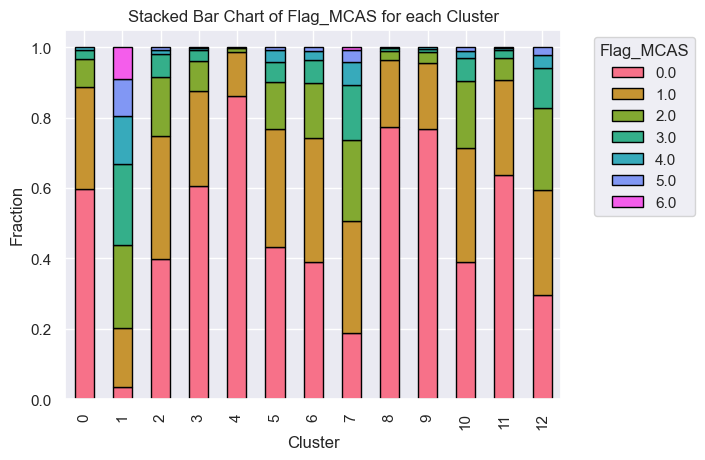

In [24]:
plot_flag("Flag_MCAS", df)
#plot_flag("Flag_MCAS", df, cluscol="cluster_ambig")
plot_flag("Flag_MCAS", df, equal_heights=True)

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

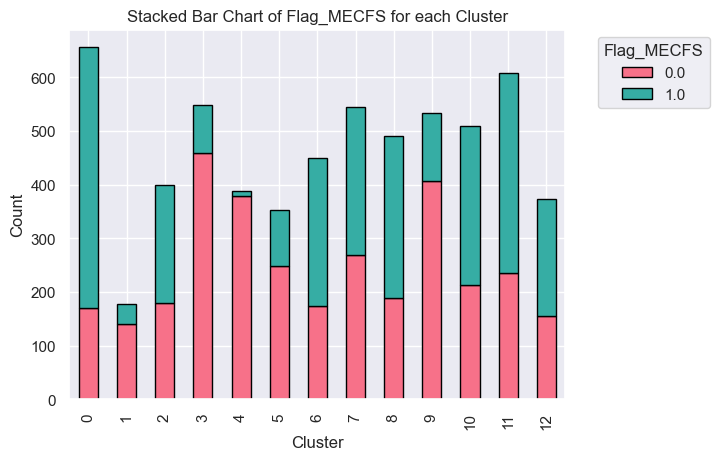

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

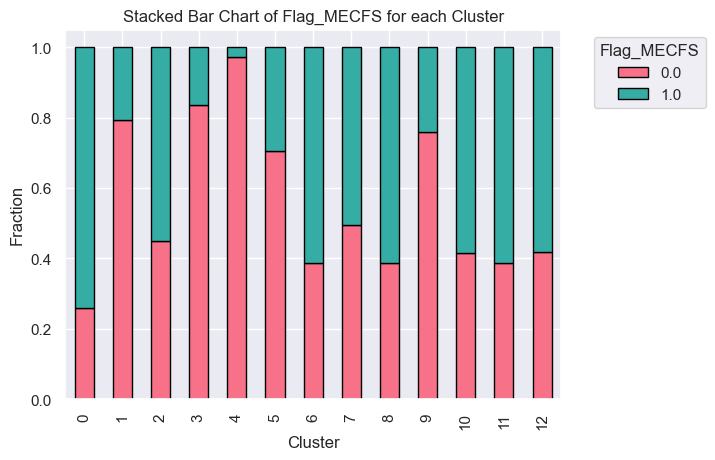

In [25]:
plot_flag("Flag_MECFS", df)
plot_flag("Flag_MECFS", df, equal_heights=True)

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

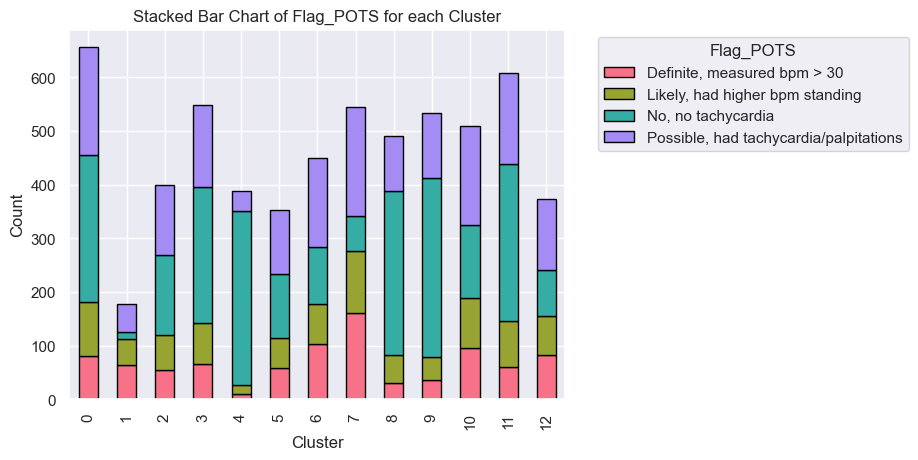

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

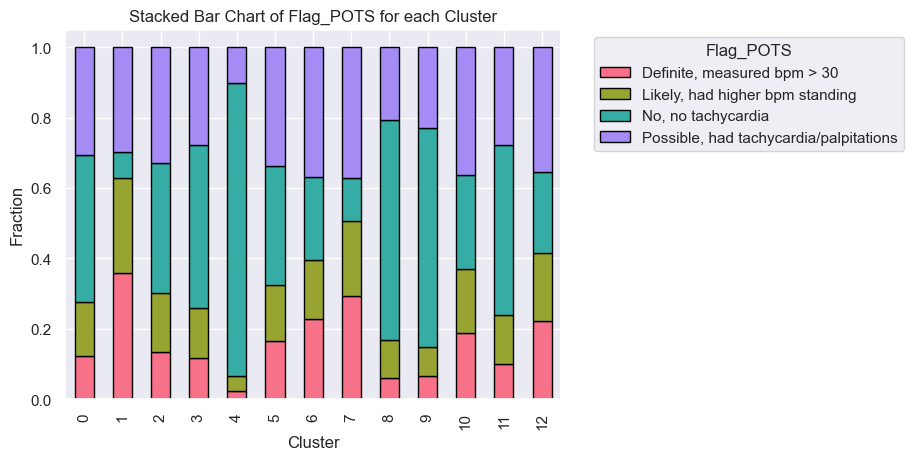

In [26]:
plot_flag("Flag_POTS", df)
plot_flag("Flag_POTS", df, equal_heights=True)

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

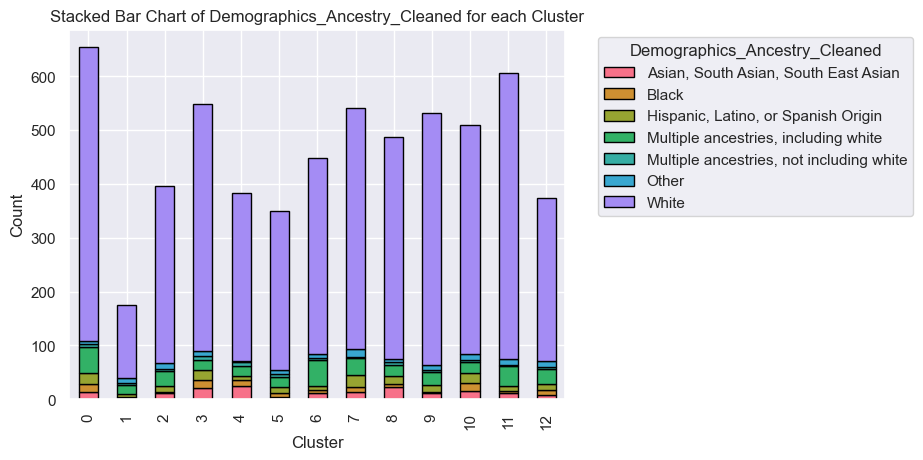

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

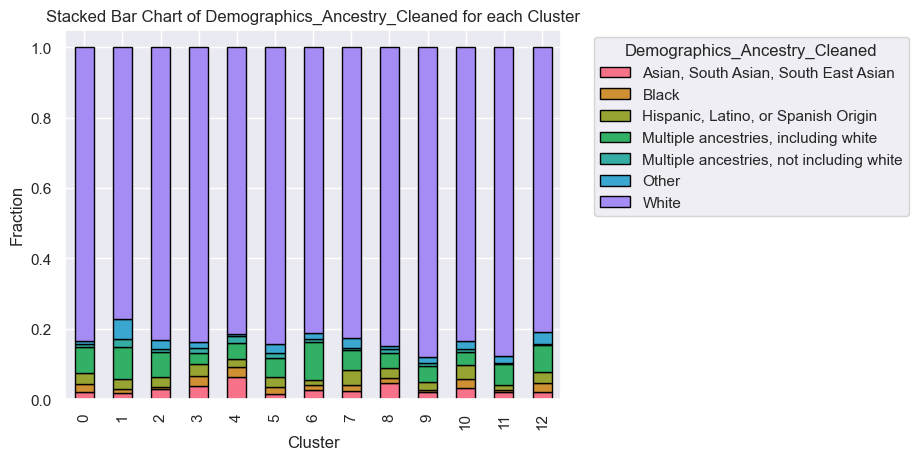

In [27]:
plot_flag("Demographics_Ancestry_Cleaned", df)
plot_flag("Demographics_Ancestry_Cleaned", df, equal_heights=True)

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

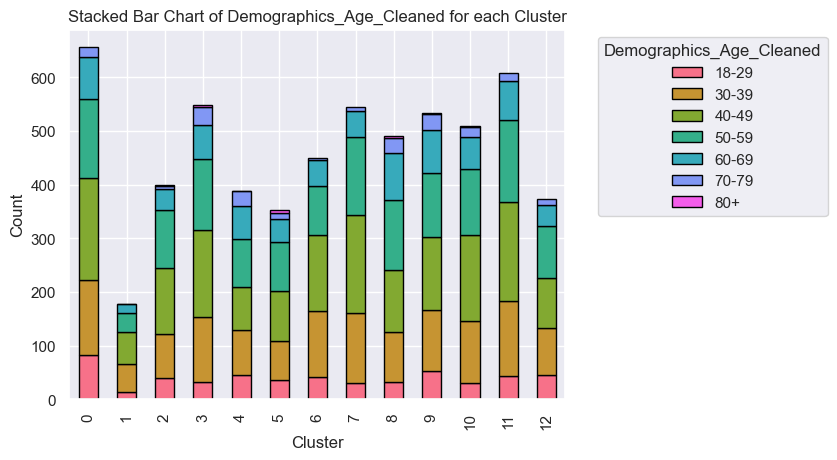

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

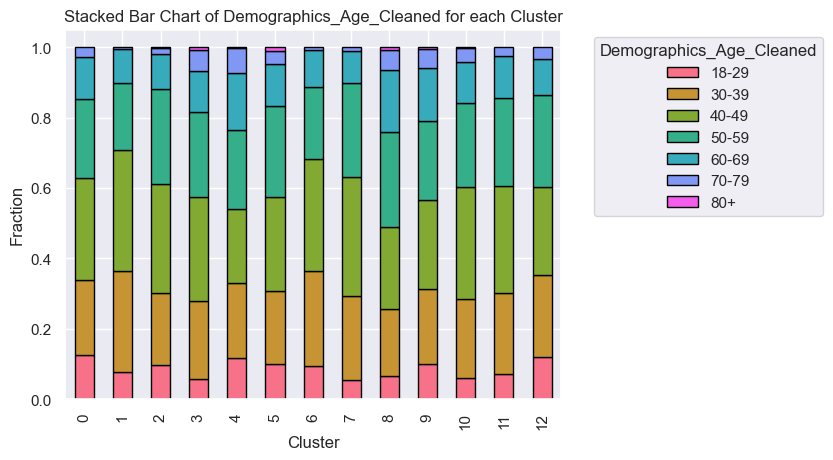

In [28]:
plot_flag("Demographics_Age_Cleaned", df)
plot_flag("Demographics_Age_Cleaned", df, equal_heights=True)

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

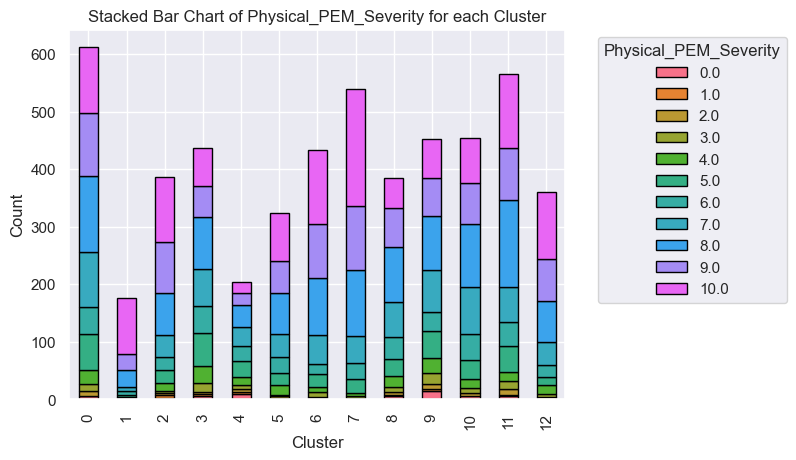

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

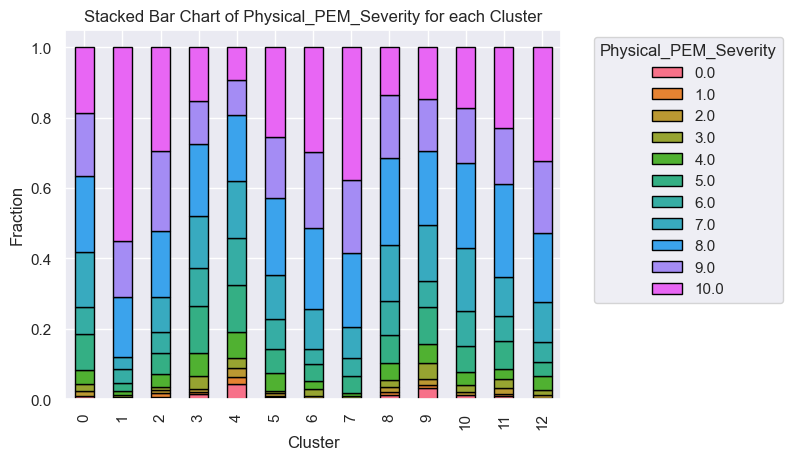

In [29]:
plot_flag("Physical_PEM_Severity", df)
plot_flag("Physical_PEM_Severity", df, equal_heights=True)

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

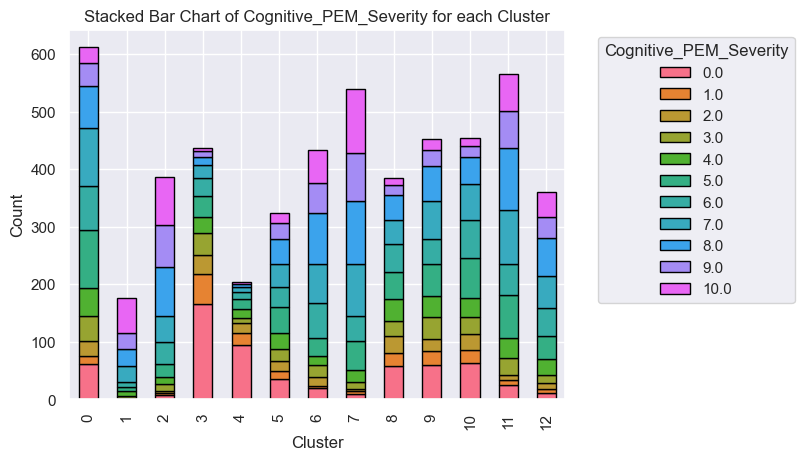

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

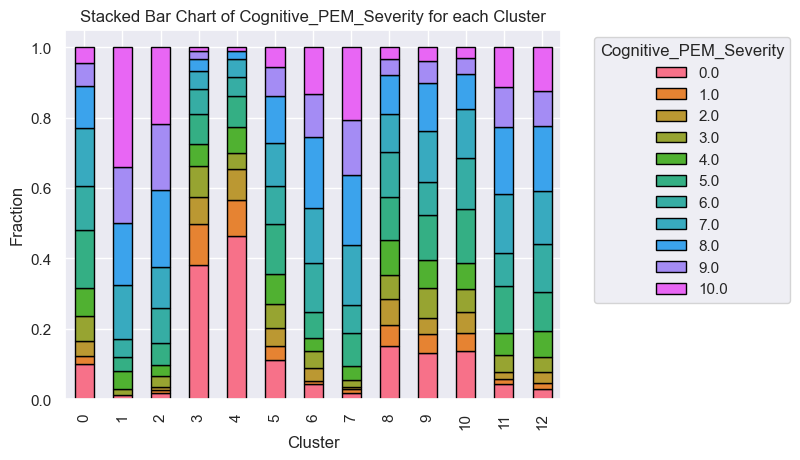

In [30]:
plot_flag("Cognitive_PEM_Severity", df)
plot_flag("Cognitive_PEM_Severity", df, equal_heights=True)

In [31]:
df_mod = df.copy()
# convert the column HasPeriods to non-categorical
df_mod['HasPeriods'] = df_mod['HasPeriods'].astype('str')

# replace nans in column HasPeriods of df_mod with "NA"
df_mod['HasPeriods'] = df_mod['HasPeriods'].fillna("NA")

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

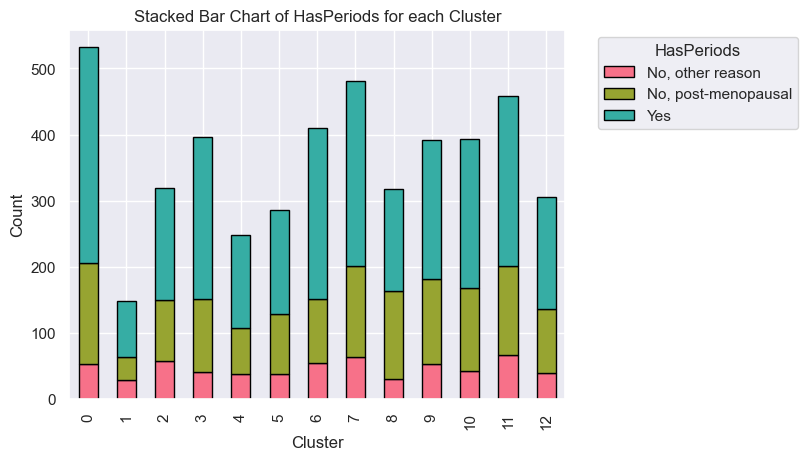

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

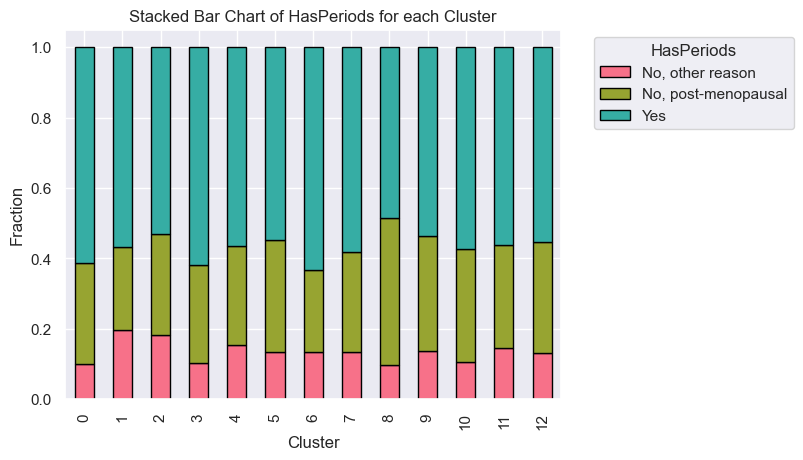

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

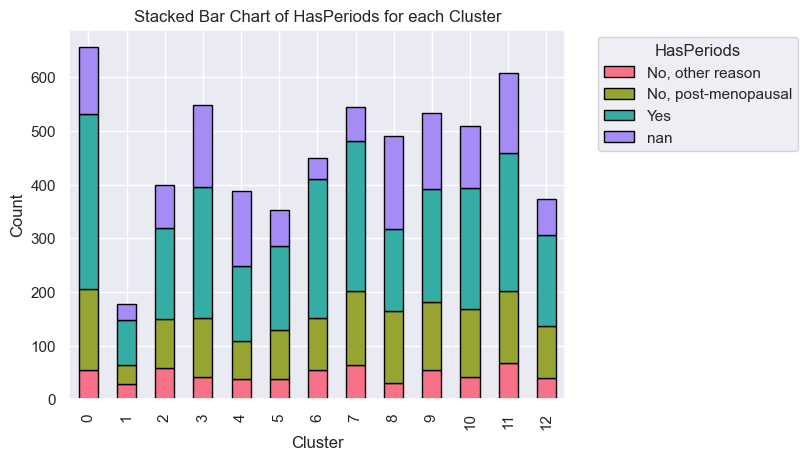

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/3309771618.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = df.groupby([cluscol, compare_var]).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

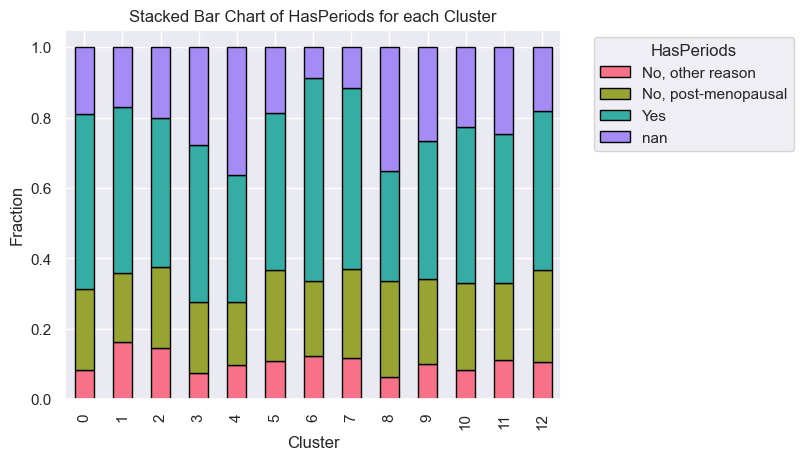

In [32]:
plot_flag("HasPeriods", df)
plot_flag("HasPeriods", df, equal_heights=True)

plot_flag("HasPeriods", df_mod)
plot_flag("HasPeriods", df_mod, equal_heights=True)

In [33]:
# for each entry in cluster, calculate the average value of each other column
# convert to not categorical
df['Cognitive_PEM_Severity'] = df['Cognitive_PEM_Severity'].astype(float)  # Convert to float or appropriate numeric type

df['Physical_PEM_Severity'] = df['Physical_PEM_Severity'].astype(float)  # Convert to float or appropriate numeric type



In [34]:
print(df.groupby('cluster')['Cognitive_PEM_Severity'].mean().sort_values())
print(df.groupby('cluster')['Cognitive_PEM_Severity'].std())


cluster
4     2.118227
3     2.577982
8     4.574026
10    4.780220
9     4.980088
5     5.271605
0     5.356209
11    6.529204
12    6.542936
6     6.718894
7     7.447124
2     7.583979
1     8.085227
Name: Cognitive_PEM_Severity, dtype: float64
cluster
0     2.746325
1     2.055962
2     2.268288
3     2.804081
4     2.593941
5     2.952723
6     2.590489
7     2.236585
8     2.954578
9     2.983629
10    2.859416
11    2.556721
12    2.506428
Name: Cognitive_PEM_Severity, dtype: float64


/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/2214597471.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('cluster')['Cognitive_PEM_Severity'].mean().sort_values())
/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/2214597471.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('cluster')['Cognitive_PEM_Severity'].std())


In [35]:
print(df.groupby('cluster')['Physical_PEM_Severity'].mean().sort_values())
print(df.groupby('cluster')['Physical_PEM_Severity'].std())



cluster
4     6.374384
9     6.962389
3     7.006881
8     7.322078
10    7.507692
0     7.519608
11    7.669027
5     7.830247
2     8.043928
12    8.199446
6     8.211982
7     8.539889
1     8.971591
Name: Physical_PEM_Severity, dtype: float64
cluster
0     2.075800
1     1.535965
2     2.098762
3     2.244267
4     2.522715
5     2.021298
6     1.847849
7     1.615384
8     2.125038
9     2.473075
10    2.005347
11    2.156595
12    1.911689
Name: Physical_PEM_Severity, dtype: float64


/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/1331021585.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('cluster')['Physical_PEM_Severity'].mean().sort_values())
/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/1331021585.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('cluster')['Physical_PEM_Severity'].std())


In [23]:
"""
# Assuming df is your DataFrame
df['Cognitive_PEM_Severity'] = df['Cognitive_PEM_Severity'].astype(float)  # Convert to float or appropriate numeric type

# Create separate histograms for each cluster
clusters = df['cluster'].unique()

fig, axes = plt.subplots(nrows=len(clusters), figsize=(8, 6 * len(clusters)))

for i, cluster in enumerate(clusters):
    data_for_cluster = df[df['cluster'] == cluster]['Cognitive_PEM_Severity']
    axes[i].hist(data_for_cluster, bins=20, alpha=0.5)
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('Cognitive_PEM_Severity')
    axes[i].set_ylabel('Frequency')

#plt.tight_layout()
#plt.show()
"""


"\n# Assuming df is your DataFrame\ndf['Cognitive_PEM_Severity'] = df['Cognitive_PEM_Severity'].astype(float)  # Convert to float or appropriate numeric type\n\n# Create separate histograms for each cluster\nclusters = df['cluster'].unique()\n\nfig, axes = plt.subplots(nrows=len(clusters), figsize=(8, 6 * len(clusters)))\n\nfor i, cluster in enumerate(clusters):\n    data_for_cluster = df[df['cluster'] == cluster]['Cognitive_PEM_Severity']\n    axes[i].hist(data_for_cluster, bins=20, alpha=0.5)\n    axes[i].set_title(f'Cluster {cluster}')\n    axes[i].set_xlabel('Cognitive_PEM_Severity')\n    axes[i].set_ylabel('Frequency')\n\n#plt.tight_layout()\n#plt.show()\n"

In [36]:
df['Flag_MECFS'] = df['Flag_MECFS'].astype(float)  # Convert to float or appropriate numeric type
#df['Flag_POTS'] = df['Flag_POTS'].astype(float)  # Convert to float or appropriate numeric type



df['Flag_MCAS'] = df['Flag_MCAS'].astype(float)  # Convert to float or appropriate numeric type


In [37]:
df['Flag_MECFS'].mean()

0.46675509865693915

In [38]:
df['Flag_MECFS'].groupby(df['cluster']).mean().sort_values()

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/2001860398.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Flag_MECFS'].groupby(df['cluster']).mean().sort_values()


cluster
4     0.028278
3     0.163934
1     0.207865
9     0.239700
5     0.295455
7     0.505515
2     0.551378
12    0.582888
10    0.583497
6     0.612472
11    0.613487
8     0.614286
0     0.740854
Name: Flag_MECFS, dtype: float64

In [39]:
df['Flag_POTS_numeric'] = df['Flag_POTS'].replace({'Definite, measured bpm > 30': 3, 'Likely, had higher bpm standing': 2,
                                                   'Possible, had tachycardia/palpitations': 1, 'No, no tachycardia': 0})

df['Flag_POTS_numeric'] = df['Flag_POTS_numeric'].astype(float)  # Convert to float or appropriate numeric type


/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/504542172.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Flag_POTS_numeric'] = df['Flag_POTS'].replace({'Definite, measured bpm > 30': 3, 'Likely, had higher bpm standing': 2,
/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/504542172.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Flag_POTS_numeric'] = df['Flag_POTS'].replace({'Definite, measured bpm > 30': 3, 'Likely, had higher bpm standing': 2,


In [40]:
df['Flag_POTS_numeric'].groupby(df['cluster']).mean().sort_values()

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/3571487350.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Flag_POTS_numeric'].groupby(df['cluster']).mean().sort_values()


cluster
4     0.257069
9     0.589888
8     0.602041
11    0.855263
3     0.918033
0     0.983232
2     1.065163
5     1.150568
10    1.290766
6     1.385301
12    1.406417
7     1.680147
1     1.915730
Name: Flag_POTS_numeric, dtype: float64

In [41]:
df['Flag_MCAS'].groupby(df['cluster']).mean().sort_values()

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/1696163148.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Flag_MCAS'].groupby(df['cluster']).mean().sort_values()


cluster
4     0.154242
8     0.275510
9     0.294007
11    0.495066
0     0.557927
3     0.570128
5     0.951705
2     0.967419
6     1.015590
10    1.031434
12    1.363636
7     1.727941
1     2.943820
Name: Flag_MCAS, dtype: float64

Text(0.5, 1.0, 'Physical_PEM_Severity in Cluster 5')

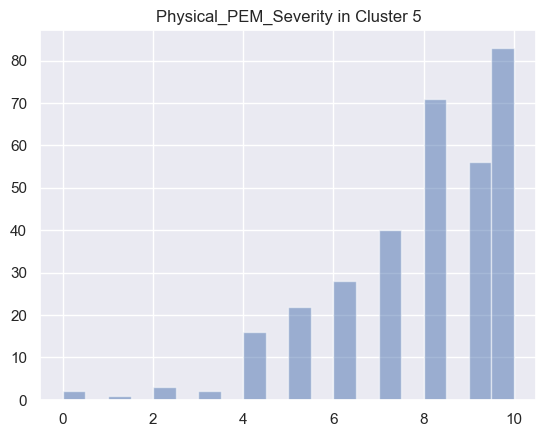

In [42]:
df['Physical_PEM_Severity'] = df['Physical_PEM_Severity'].astype(float)  # Convert to float or appropriate numeric type

# Create separate histograms for each cluster
cluster = 5

data_for_cluster = df[df['cluster'] == cluster]
plt.hist(data_for_cluster['Physical_PEM_Severity'], bins=20, alpha=0.5)
plt.title(f'Physical_PEM_Severity in Cluster {cluster}')


Text(0.5, 1.0, 'Cognitive_PEM_Severity in Cluster 5')

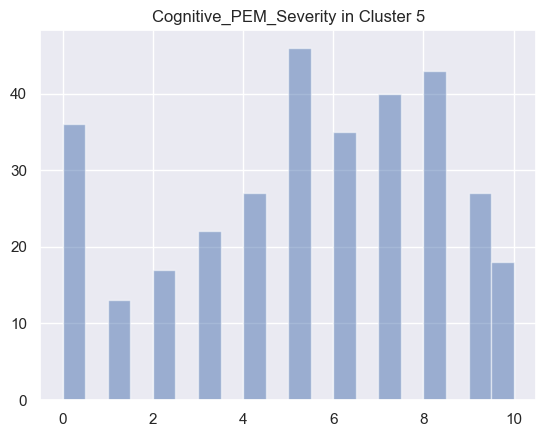

In [43]:

plt.hist(data_for_cluster['Cognitive_PEM_Severity'], bins=20, alpha=0.5)
plt.title(f'Cognitive_PEM_Severity in Cluster {cluster}')


In [44]:
#extract patients from cluster 1
df_clus1 = df[df['cluster'] == 1]

In [45]:
df_clus1.isna().sum().sort_values(ascending=False).head(15)

HasPeriods                       30
Demographics_Gender_Cleaned       4
Cognitive_PEM_Severity            2
Physical_PEM_Severity             2
Demographics_Ancestry_Cleaned     2
Symptom_Memory_short              0
Symptom_Dermatographia            0
Symptom_Skin_rashes               0
Symptom_Skin_Allergy_other        0
Symptom_Muscle_spasms             0
Symptom_Muscle_aches              0
Symptom_Joint_pain                0
Symptom_Bone_ache_burning         0
Symptom_Inability_to_yawn         0
Symptom_Changes_in_voice          0
dtype: int64

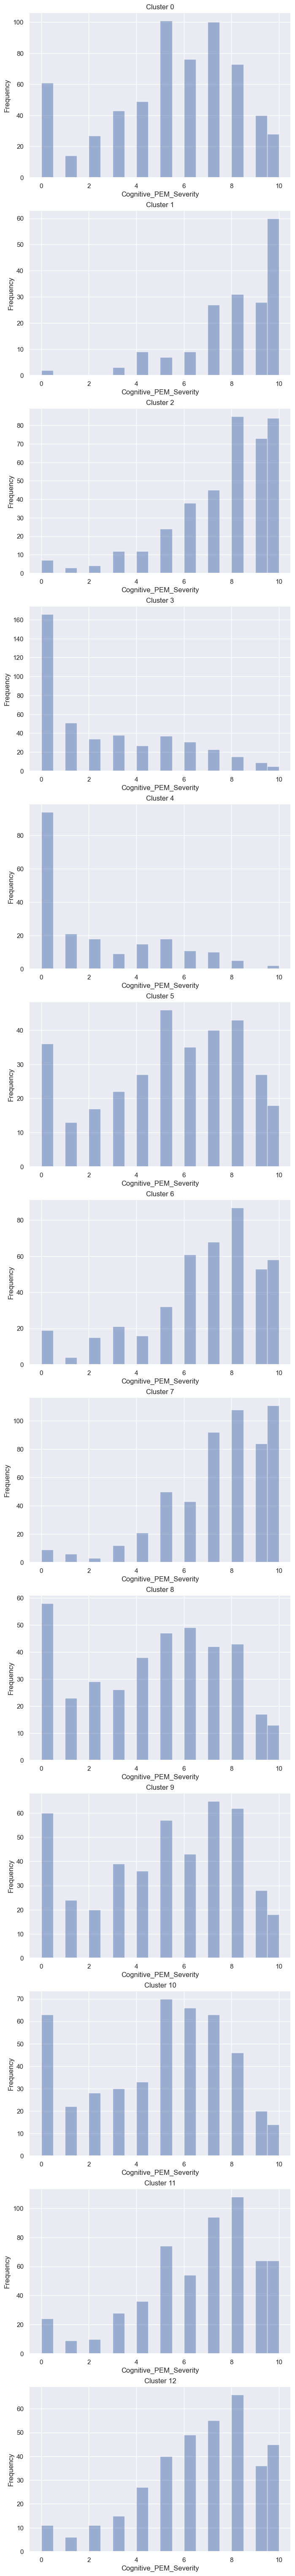

In [46]:
df['Cognitive_PEM_Severity'] = df['Cognitive_PEM_Severity'].astype(float)  # Convert to float or appropriate numeric type

# Create separate histograms for each cluster
clusters = df['cluster'].unique().sort_values()

fig, axes = plt.subplots(nrows=len(clusters), figsize=(8, 6 * len(clusters)))

for i, cluster in enumerate(clusters):
    data_for_cluster = df[df['cluster'] == cluster]['Cognitive_PEM_Severity']
    axes[i].hist(data_for_cluster, bins=20, alpha=0.5)
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('Cognitive_PEM_Severity')
    axes[i].set_ylabel('Frequency')

#plt.tight_layout()
#plt.show()

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/641831819.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.hist("Cognitive_PEM_Severity", by="cluster", bins=20, figsize=(12, 8))


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>],
       [<Axes: title={'center': '12'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

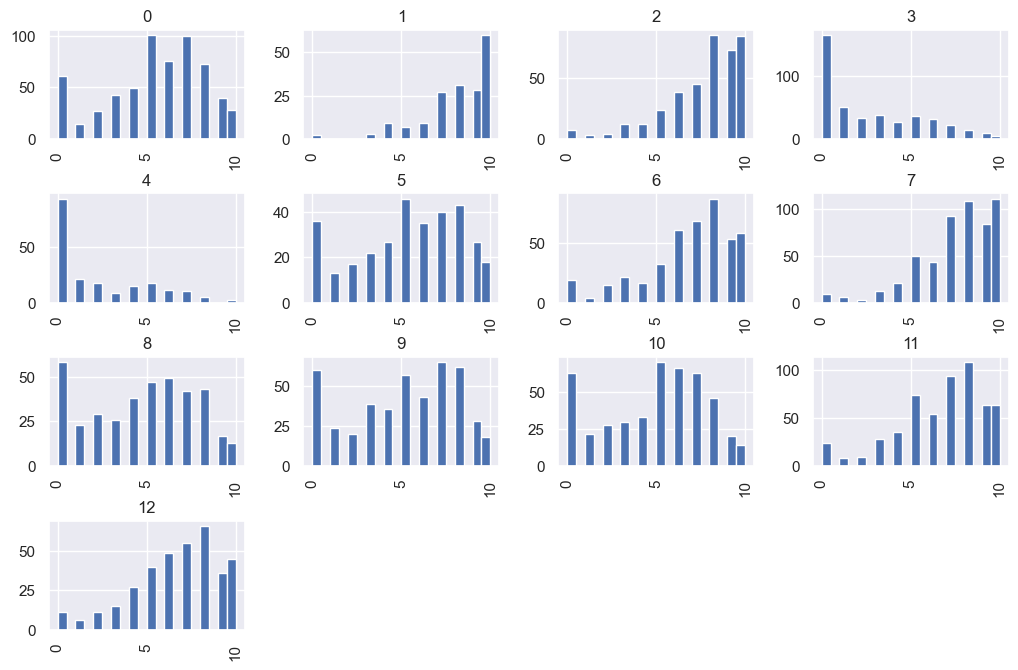

In [47]:
df.hist("Cognitive_PEM_Severity", by="cluster", bins=20, figsize=(12, 8))

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/792100908.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.hist("Physical_PEM_Severity", by="cluster", bins=20, figsize=(12, 8))


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>],
       [<Axes: title={'center': '12'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

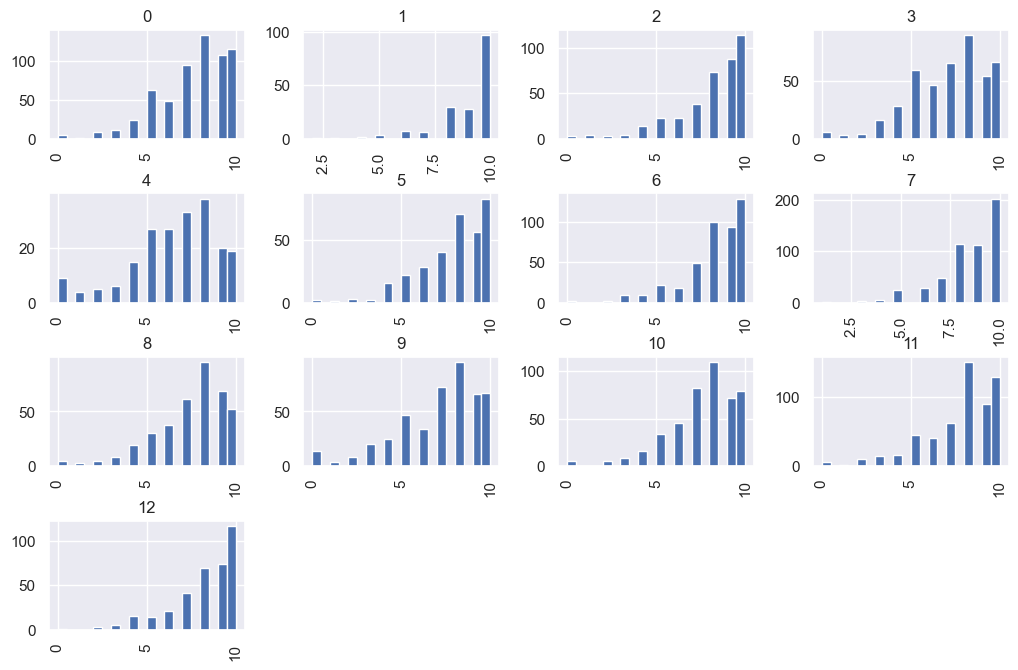

In [48]:
df.hist("Physical_PEM_Severity", by="cluster", bins=20, figsize=(12, 8))

array([[<Axes: title={'center': 'Physical_PEM_Severity'}>]], dtype=object)

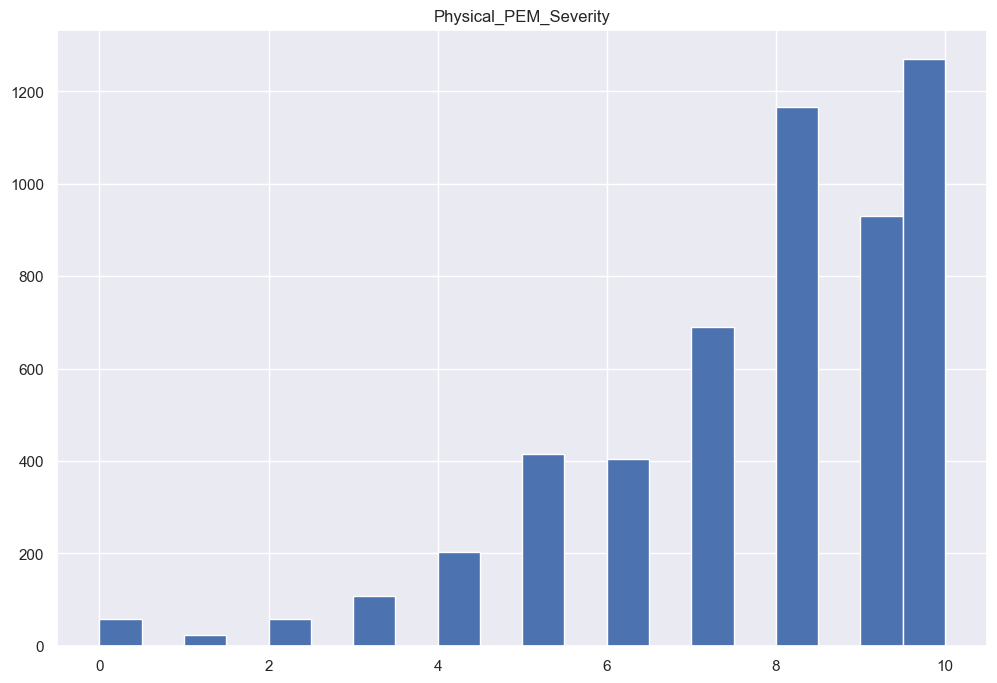

In [49]:
df.hist("Physical_PEM_Severity", bins=20, figsize=(12, 8))

In [50]:
df['Cognitive_PEM_Severity'].value_counts()

Cognitive_PEM_Severity
8.0     772
7.0     724
0.0     610
5.0     603
6.0     565
10.0    520
9.0     479
4.0     346
3.0     298
2.0     216
1.0     196
Name: count, dtype: int64

In [51]:
# check what fraction of patients in each cluster have NaN for HasPeriods
df['HasPeriods'] = df['HasPeriods'].astype('str')
df.groupby('cluster')['HasPeriods'].value_counts(normalize=True)
# from this groupby print just the values for 'nan'
df.groupby('cluster')['HasPeriods'].value_counts(normalize=True).loc[:, 'nan'].sort_values()


/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/2939411116.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('cluster')['HasPeriods'].value_counts(normalize=True)
/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/2939411116.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('cluster')['HasPeriods'].value_counts(normalize=True).loc[:, 'nan'].sort_values()


cluster
6     0.086860
7     0.115809
1     0.168539
12    0.181818
5     0.187500
0     0.189024
2     0.200501
10    0.227898
11    0.246711
9     0.265918
3     0.278689
8     0.351020
4     0.362468
Name: proportion, dtype: float64

In [52]:
x = df.groupby('cluster')['HasPeriods'].value_counts(normalize=True).loc[:, 'No, other reason']/(df.groupby('cluster')['HasPeriods'].value_counts(normalize=True).loc[:, 'No, other reason'] + df.groupby('cluster')['HasPeriods'].value_counts(normalize=True).loc[:, 'Yes'])

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/4126206074.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x = df.groupby('cluster')['HasPeriods'].value_counts(normalize=True).loc[:, 'No, other reason']/(df.groupby('cluster')['HasPeriods'].value_counts(normalize=True).loc[:, 'No, other reason'] + df.groupby('cluster')['HasPeriods'].value_counts(normalize=True).loc[:, 'Yes'])
/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/4126206074.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x = df.groupby('cluster')['HasPeriods'].value_counts(normalize=True).loc[:, 'No, other re

In [53]:
x.sort_values()

cluster
0     0.142105
3     0.143357
10    0.157303
8     0.167568
6     0.175159
7     0.186047
12    0.191388
5     0.194872
9     0.204545
11    0.206790
4     0.213483
2     0.255507
1     0.256637
Name: proportion, dtype: float64

In [54]:
df['Flag_POTS_numeric_norm']= df['Flag_POTS_numeric']/3
df['Flag_POTS_numeric_norm'].groupby(df['cluster']).mean().sort_values()

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/4267613373.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Flag_POTS_numeric_norm'].groupby(df['cluster']).mean().sort_values()


cluster
4     0.085690
9     0.196629
8     0.200680
11    0.285088
3     0.306011
0     0.327744
2     0.355054
5     0.383523
10    0.430255
6     0.461767
12    0.468806
7     0.560049
1     0.638577
Name: Flag_POTS_numeric_norm, dtype: float64

In [55]:
df['Flag_MCAS_norm'] = df['Flag_MCAS']/df['Flag_MCAS'].max()
df['Flag_MCAS_norm'].groupby(df['cluster']).mean()

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/881445669.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Flag_MCAS_norm'].groupby(df['cluster']).mean()


cluster
0     0.092988
1     0.490637
2     0.161236
3     0.095021
4     0.025707
5     0.158617
6     0.169265
7     0.287990
8     0.045918
9     0.049001
10    0.171906
11    0.082511
12    0.227273
Name: Flag_MCAS_norm, dtype: float64

In [56]:
clus_info = pd.DataFrame(index = range(13))

In [57]:
clus_info['size'] = df['cluster'].value_counts().sort_index()

In [58]:
clus_info['Flag_MECFS'] = df['Flag_MECFS'].groupby(df['cluster']).mean().sort_index()
clus_info['Flag_POTS'] = df['Flag_POTS_numeric_norm'].groupby(df['cluster']).mean().sort_index()
clus_info['Flag_MCAS'] = df['Flag_MCAS_norm'].groupby(df['cluster']).mean().sort_index()

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/2569949080.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clus_info['Flag_MECFS'] = df['Flag_MECFS'].groupby(df['cluster']).mean().sort_index()
/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/2569949080.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clus_info['Flag_POTS'] = df['Flag_POTS_numeric_norm'].groupby(df['cluster']).mean().sort_index()
/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/2569949080.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a fut

In [59]:
result_series = df.groupby('cluster')['Demographics_Gender_Cleaned'].apply(lambda x: (x == 'Woman').mean())


/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/2780297102.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_series = df.groupby('cluster')['Demographics_Gender_Cleaned'].apply(lambda x: (x == 'Woman').mean())


In [60]:

df.groupby('cluster')['HasPeriods'].transform(lambda x: (x != 'nan').mean())

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/1153241840.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('cluster')['HasPeriods'].transform(lambda x: (x != 'nan').mean())


3        0.648980
5        0.753289
6        0.772102
8        0.810976
9        0.772102
           ...   
14158    0.799499
14161    0.753289
14163    0.913140
14166    0.648980
14168    0.753289
Name: HasPeriods, Length: 6031, dtype: float64

In [61]:
result_series

cluster
0     0.794207
1     0.848315
2     0.769424
3     0.744991
4     0.640103
5     0.835227
6     0.902004
7     0.880515
8     0.673469
9     0.737828
10    0.799607
11    0.745066
12    0.812834
Name: Demographics_Gender_Cleaned, dtype: float64

In [62]:
clus_info['frac_women'] = result_series

In [63]:
# get mean number of symptoms per category
meansymp = []
for clus in range(13):
    mini =  sympdf[df['cluster']==clus]
    meansymp.append(int(mini.sum(axis=1).mean().round()))


In [64]:
clus_info['symptom_count'] = meansymp

In [65]:
print(df.columns[-20:])

Index(['Symptom_Fatigue', 'Symptom_Change_sensitivity_to_meds',
       'Symptom_New_allergies', 'Demographics_Ancestry_Cleaned',
       'Demographics_Gender_Cleaned', 'Demographics_Trans_Cleaned',
       'Demographics_Age_Cleaned', 'Flag_MECFS', 'Flag_POTS', 'Flag_MCAS',
       'FAS', 'FAS_cat', 'Physical_PEM_Severity', 'Cognitive_PEM_Severity',
       'HasPeriods', 'cluster', 'cluster_ambig', 'Flag_POTS_numeric',
       'Flag_POTS_numeric_norm', 'Flag_MCAS_norm'],
      dtype='object')


In [68]:
df['Age_numeric'] = df['Demographics_Age_Cleaned'].replace({'30-39': 34.5,'40-49': 44.5, '50-59':54.5, '60-69':64.5,
                                                    '70-79': 74.5, '80+': 80.0,'18-29' : 23.5})

df['Age_numeric'] = df['Age_numeric'].astype(float)  # Convert to float or appropriate numeric type

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/3372242810.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Age_numeric'] = df['Demographics_Age_Cleaned'].replace({'30-39': 34.5,'40-49': 44.5, '50-59':54.5, '60-69':64.5,
/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/3372242810.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Age_numeric'] = df['Demographics_Age_Cleaned'].replace({'30-39': 34.5,'40-49': 44.5, '50-59':54.5, '60-69':64.5,


In [69]:
clus_info['Age_numeric'] = df['Age_numeric'].groupby(df['cluster']).mean().sort_index()


/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/996767490.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clus_info['Age_numeric'] = df['Age_numeric'].groupby(df['cluster']).mean().sort_index()


In [70]:
clus_info['Physical_PEM_Severity'] = df['Physical_PEM_Severity'].groupby(df['cluster']).mean().sort_index()/10
clus_info['Cognitive_PEM_Severity'] = df['Cognitive_PEM_Severity'].groupby(df['cluster']).mean().sort_index()/10

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/1101921238.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clus_info['Physical_PEM_Severity'] = df['Physical_PEM_Severity'].groupby(df['cluster']).mean().sort_index()/10
/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_85005/1101921238.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clus_info['Cognitive_PEM_Severity'] = df['Cognitive_PEM_Severity'].groupby(df['cluster']).mean().sort_index()/10


In [71]:
clus_info.to_csv("output/cluster_13_111023_cluster_info.csv")

In [72]:
df['Physical_PEM_Severity'].max()

10.0